# Importing the libraries

# Question 1

In [33]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets

# Importing the dataset

In [34]:
data = datasets.load_iris()
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# Exploring the dataset attributes such as values,target name,feature name

In [35]:
x = data.data
y = data.target
z = data.target_names
print(data.feature_names)
print(x[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[5.1 3.5 1.4 0.2]


# Creating the train,test and validation split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(x, y, train_size=0.8, random_state=0)

In [37]:
test_size = 0.5
X_valid,X_test,y_valid,y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=0)

# Build the model

In [48]:
model = Sequential()
model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(3, kernel_initializer='normal', activation='sigmoid'))

In [49]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training the model

In [50]:
model_history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
4/4 [==============================] - 2s 102ms/step - loss: 1.0994 - accuracy: 0.3667 - val_loss: 1.1060 - val_accuracy: 0.2000
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 1.0982 - accuracy: 0.3667 - val_loss: 1.1066 - val_accuracy: 0.2000
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 1.0970 - accuracy: 0.3667 - val_loss: 1.1071 - val_accuracy: 0.2000
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 1.0958 - accuracy: 0.3667 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 1.0947 - accuracy: 0.3667 - val_loss: 1.1081 - val_accuracy: 0.2000
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 1.0934 - accuracy: 0.3667 - val_loss: 1.1090 - val_accuracy: 0.2000
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 1.0923 - accuracy: 0.3667 - val_loss: 1.1102 - val_accuracy: 0.2000
Epoch 8/100
4/4 [==

# Using the test data to perform the prediction on unseen data

In [51]:
pred=model.predict(X_test[:10])
print(pred)

[[0.58185834 0.4857638  0.4253697 ]
 [0.31819573 0.59522814 0.6474241 ]
 [0.20079544 0.653758   0.7544165 ]
 [0.14998004 0.68572545 0.8048105 ]
 [0.565171   0.49283937 0.43936467]
 [0.17154497 0.671175   0.78295445]
 [0.23756516 0.6338733  0.71980196]
 [0.21876737 0.6437653  0.73732954]
 [0.23094681 0.6375009  0.7259965 ]
 [0.56947774 0.4912161  0.43582675]]


In [52]:
p=np.argmax(pred, axis=1)
print(p)
print(y_test[:10])

[0 2 2 2 0 2 2 2 2 0]
[0 1 1 2 0 2 1 1 1 0]


In [53]:
for i in p:
  print("Predicted-Class: {},   Name: {}".format(i,z[i]))

Predicted-Class: 0,   Name: setosa
Predicted-Class: 2,   Name: virginica
Predicted-Class: 2,   Name: virginica
Predicted-Class: 2,   Name: virginica
Predicted-Class: 0,   Name: setosa
Predicted-Class: 2,   Name: virginica
Predicted-Class: 2,   Name: virginica
Predicted-Class: 2,   Name: virginica
Predicted-Class: 2,   Name: virginica
Predicted-Class: 0,   Name: setosa


# Calculating and printing the training,validation and testing accuracy

In [54]:
train_results = model.evaluate(X_train, y_train)

4/4 [==============================] - 0s 3ms/step - loss: 0.7177 - accuracy: 0.6917


In [55]:
valid_results = model.evaluate(X_valid, y_valid)

1/1 [==============================] - 0s 28ms/step - loss: 0.7856 - accuracy: 0.6667


In [56]:
test_results = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 20ms/step - loss: 0.8361 - accuracy: 0.4667


In [57]:
print("The training accuracy for the model is {} %".format(train_results[1]*100))
print("The validation accuracy for the improved model is {} %".format(valid_results[1]*100))
print("The testing accuracy for the improved model is {} %".format(test_results[1]*100))

The training accuracy for the model is 69.16666626930237 %
The validation accuracy for the improved model is 66.66666865348816 %
The testing accuracy for the improved model is 46.666666865348816 %


# Rebuilding the model by adding additional dense layers

In [58]:
model = Sequential()
model.add(Dense(20, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(3, kernel_initializer='normal', activation='sigmoid'))

In [59]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training the improved model

In [60]:
model_history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
4/4 [==============================] - 1s 60ms/step - loss: 1.0891 - accuracy: 0.3250 - val_loss: 1.0760 - val_accuracy: 0.5333
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0815 - accuracy: 0.5750 - val_loss: 1.0735 - val_accuracy: 0.6667
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 1.0742 - accuracy: 0.6917 - val_loss: 1.0717 - val_accuracy: 0.6667
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0666 - accuracy: 0.6917 - val_loss: 1.0692 - val_accuracy: 0.6667
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 1.0596 - accuracy: 0.6917 - val_loss: 1.0652 - val_accuracy: 0.6667
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 1.0528 - accuracy: 0.6917 - val_loss: 1.0607 - val_accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 1.0456 - accuracy: 0.6917 - val_loss: 1.0559 - val_accuracy: 0.6667
Epoch 8/100
4/4 [=====

# Using the test data to perform prediction on unseen data

In [61]:
pred_new=model.predict(X_test[:10])
print(pred_new)

[[0.9583373  0.42890626 0.00813523]
 [0.27108258 0.63195753 0.45289916]
 [0.10299525 0.6984112  0.67806554]
 [0.03460187 0.7458265  0.88357913]
 [0.8996246  0.47235274 0.02480841]
 [0.05940247 0.72195554 0.8057384 ]
 [0.1626494  0.6729859  0.5579251 ]
 [0.14191887 0.682136   0.58468074]
 [0.11794829 0.6851295  0.68125105]
 [0.8861755  0.4769606  0.03098065]]


In [64]:
p_new=np.argmax(pred_new, axis=1)
print(p_new)
print(y_test[:10])

[0 1 1 2 0 2 1 1 1 0]
[0 1 1 2 0 2 1 1 1 0]


In [65]:
for i in p:
  print("Predicted-Class: {},   Name: {}".format(i,z[i]))

Predicted-Class: 0,   Name: setosa
Predicted-Class: 2,   Name: virginica
Predicted-Class: 2,   Name: virginica
Predicted-Class: 2,   Name: virginica
Predicted-Class: 0,   Name: setosa
Predicted-Class: 2,   Name: virginica
Predicted-Class: 2,   Name: virginica
Predicted-Class: 2,   Name: virginica
Predicted-Class: 2,   Name: virginica
Predicted-Class: 0,   Name: setosa


# Calculating and printing the training,validation and testing accuracy for improved model

In [66]:
train_results_new = model.evaluate(X_train, y_train)

4/4 [==============================] - 0s 3ms/step - loss: 0.3341 - accuracy: 0.9500


In [67]:
valid_results_new = model.evaluate(X_valid, y_valid)

1/1 [==============================] - 0s 19ms/step - loss: 0.2867 - accuracy: 0.9333


In [68]:
test_results_new = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 18ms/step - loss: 0.4274 - accuracy: 1.0000


In [69]:
print("The training accuracy for the improved model is {} %".format(train_results_new[1]*100))
print("The validation accuracy for the improved model is {} %".format(valid_results_new[1]*100))
print("The testing accuracy for the improved model is {} %".format(test_results_new[1]*100))

The training accuracy for the improved model is 94.9999988079071 %
The validation accuracy for the improved model is 93.33333373069763 %
The testing accuracy for the improved model is 100.0 %


# Question 2

# Unzipping the embeddings datafile

In [1]:
!unzip /content/vectors.txt.zip

Archive:  /content/vectors.txt.zip
  inflating: vectors.txt             
   creating: __MACOSX/
  inflating: __MACOSX/._vectors.txt  


# Reading the embeddings file

In [2]:
filename = 'vectors.txt'

with open(filename) as f:
    file_list = f.read().splitlines()

In [3]:
# Convert string to a list

def Convert(string):
  li = list(string.split(' '))
  return li

# Converting the datfile into vector form

In [4]:
import numpy as np

words = [] 
vectors = []
word_embeddings = {}

for line in file_list: 
  li = Convert(line)
  vector = np.array(li[1:], dtype=float)
  word = li[0]
  words.append(word)
  vectors.append(vector)
  word_embeddings[word] = vector
  
vectors = np.array(vectors)
np.shape(vectors)

(400001, 50)

# Word embeddings for the word life

In [5]:
word_embeddings['life']

array([ 0.51491 ,  0.88806 , -0.71906 , -0.5748  ,  0.85655 ,  0.52474 ,
       -0.31788 , -0.20168 ,  0.17936 ,  0.51999 , -0.11527 ,  0.59296 ,
       -0.3468  ,  0.052568,  0.87153 , -0.036582, -0.056057,  0.08516 ,
        0.036249,  0.23403 ,  0.073175,  1.1394  , -0.17921 , -0.034245,
        0.69977 , -1.6516  , -1.106   , -0.44145 ,  0.77042 ,  0.23963 ,
        3.1823  , -0.020451, -0.056117, -0.69918 , -0.19543 ,  0.19492 ,
       -0.36403 ,  0.053196,  0.26225 , -0.29054 , -0.64883 , -0.057846,
        0.21646 ,  0.40237 , -0.1413  , -0.015453, -0.11988 , -0.99837 ,
       -0.066328,  0.13118 ])

# Word embeddings for the word market

In [6]:
word_embeddings['market']

array([-0.0093193, -0.72787  ,  0.4683   ,  0.29756  ,  0.42387  ,
       -0.98397  , -0.80987  , -1.0172   , -0.012549 ,  0.72708  ,
        0.34809  , -0.066407 , -0.60332  , -0.18149  ,  0.14072  ,
        1.2122   , -0.30229  , -0.16803  , -0.26369  , -0.60949  ,
        1.5426   , -0.58742  , -0.7123   ,  0.078042 , -0.26746  ,
       -1.3635   , -0.27867  ,  0.30661  ,  0.60558  ,  0.8493   ,
        3.7764   ,  0.28187  ,  1.2976   ,  0.13246  , -0.082881 ,
       -1.1496   , -1.0379   ,  0.24816  ,  0.31573  , -0.52777  ,
       -0.65206  , -0.013762 ,  0.34965  ,  0.030161 ,  0.82582  ,
        0.25493  ,  0.088389 ,  0.38069  ,  0.84202  ,  0.38185  ])

# Word embeddings for the word Stanford

In [7]:
word_embeddings['stanford']

array([-0.85832  ,  0.73425  ,  0.19766  ,  0.58025  , -0.37806  ,
       -0.11938  , -0.79155  , -0.065553 , -0.4881   ,  0.18677  ,
       -0.36766  ,  0.10649  , -0.60808  , -0.31727  ,  0.1513   ,
       -0.11636  , -0.04098  ,  0.46718  , -0.80415  ,  0.78716  ,
       -0.12852  ,  0.32343  , -0.082426 , -0.49933  , -0.2403   ,
       -1.4907   ,  0.65099  , -0.86043  , -1.2558   , -0.91378  ,
        1.0037   , -0.34902  ,  0.089602 , -1.2774   ,  0.24489  ,
        0.032766 , -0.47701  ,  1.1391   ,  1.6134   , -0.7629   ,
       -0.12578  , -0.23392  ,  0.0029384,  0.93959  ,  0.029693 ,
        0.4131   ,  0.76054  ,  0.15676  , -0.57416  ,  0.39625  ])

In [8]:
from scipy.spatial import distance

def cos_similarity(a, b):
  return 1 - distance.cosine(a, b)

#  Indices of n largest elements in list


In [9]:
def n_largest(items, n = 20):
  return sorted(range(len(items)), key = lambda sub: items[sub])[-n:]

# Calculate cosine similarity scores 

In [10]:
def cos_similarity_scores(word, all_words):
  scores = []
  for vector in all_words: 
    scores.append(cos_similarity(word, vector))
  return scores

# Cosine similarity scores for the word life

In [11]:
cos_similarity_scores(word_embeddings['life'], vectors)

[0.701486171733609,
 0.7227956404306888,
 0.7804572898798428,
 0.7617813305818261,
 0.7090470735077345,
 0.7507607965407815,
 0.7007505248607424,
 0.731300972879272,
 0.6784905061444636,
 0.7387015221811394,
 0.7174470526140074,
 0.5301815747785276,
 0.7583058717580062,
 0.6484764310319499,
 0.7446657465237809,
 0.6746683530188347,
 0.48060363649910887,
 0.7068573865447548,
 0.7517032945699296,
 0.7947627270422302,
 0.7680954919300803,
 0.6346084988969217,
 0.5649643690567915,
 0.4370075936905755,
 0.45381227422164994,
 0.6698912056346974,
 0.7767027901424867,
 0.7444176435614246,
 0.7737787675492207,
 0.7266592375462322,
 0.7075379404654165,
 0.6844512097348132,
 0.6225600958436012,
 0.6609194999182191,
 0.7743118420249469,
 0.5337828028635883,
 0.7485281011762388,
 0.799416619226272,
 0.6945577212220567,
 0.7163165512730532,
 0.6399622758180389,
 0.7252422036821096,
 0.7042414266792686,
 0.6016794599068853,
 0.7427070611995716,
 0.6690703919536982,
 0.6983763368347324,
 0.65747265224

# Cosine similarity scores for the word market

In [12]:
cos_similarity_scores(word_embeddings['market'], vectors)

[0.5773994012153588,
 0.6386601015773669,
 0.6481311158149584,
 0.56339665765543,
 0.6384142514533464,
 0.6022443968685974,
 0.6150166338960369,
 0.5618184552926669,
 0.4026291479810368,
 0.6099350413850324,
 0.6018082666254694,
 0.5543586008717872,
 0.6341073359902405,
 0.6281313235630613,
 0.5754378702608177,
 0.50200440857417,
 0.535826874467123,
 0.5745252337147098,
 0.45168047580004145,
 0.6379011388714545,
 0.6647041072565625,
 0.5716623347837662,
 0.5875251761988487,
 0.3063807548568138,
 0.33624866675501397,
 0.6016526152488431,
 0.3853429340028438,
 0.495562680060183,
 0.5031442272268186,
 0.5584228401238588,
 0.6057064189583174,
 0.6399536511788919,
 0.5544211856565558,
 0.5820310497445392,
 0.6384985946379712,
 0.452545725843301,
 0.5699837365662803,
 0.6584687255621199,
 0.37726423621460914,
 0.5559677842339794,
 0.49137710436400617,
 0.4312313147542628,
 0.6362219200606006,
 0.6459818505055778,
 0.5484517348071892,
 0.4825027331587055,
 0.5723181013981457,
 0.7349749777960

# Cosine similarity scores for the word Stanford

In [13]:
cos_similarity_scores(word_embeddings['stanford'], vectors)

[0.34048453450831573,
 0.41164379338817036,
 0.39015381882949707,
 0.3190528404714694,
 0.3543298446190799,
 0.3545875015213672,
 0.42370502343546046,
 0.3272032745786081,
 0.05272199770252939,
 0.40553004854456354,
 0.4189198903434812,
 0.3089458311529225,
 0.29295927254978227,
 0.3144747268667407,
 0.2944703390671076,
 0.36398920426780434,
 0.2937027041230684,
 0.35916705194542786,
 0.4944523049124333,
 0.3305817741990533,
 0.30133460522768873,
 0.3007981751473927,
 0.5518602293498606,
 0.3462422405799397,
 0.3541406710763543,
 0.42105861045307114,
 0.4050916672099484,
 0.2524880983337917,
 0.2269268900926773,
 0.34786580366952435,
 0.24930903990076025,
 0.41068837788225676,
 0.1834823925122573,
 0.29528501143618646,
 0.3457354202286044,
 0.1795140120759573,
 0.25347800399528553,
 0.28416857275530893,
 0.4693350622963841,
 0.26560198274264424,
 0.3769924479354384,
 0.2894638379359411,
 0.26809404872739095,
 0.30458322468595234,
 0.2369141144219209,
 0.3247047221580832,
 0.20475035491

# Finding 20 highest scores

In [14]:
def n_most_similar(words, scores, n = 20): 
  index_values = n_largest(scores, n+1)
  highest_scores = [] 
  most_similar_words = []
  for value in index_values:
    highest_scores.append(scores[value])
    most_similar_words.append(words[value])
  return dict(zip(most_similar_words, highest_scores))

# Finding cosine similarity for the word life

In [15]:
life_cos_similarity_scores = cos_similarity_scores(word_embeddings['life'], vectors)
life_20_most_similar = n_most_similar(words, life_cos_similarity_scores)
life_20_most_similar

{'child': 0.8168196357102481,
 'experience': 0.8213189099822807,
 'fact': 0.7996559040409892,
 'her': 0.8037770289741492,
 'indeed': 0.8049614685826323,
 'kind': 0.8338872609897519,
 'life': 1.0,
 'lives': 0.8392689150907716,
 'love': 0.8403438472391277,
 'mind': 0.8514841863412058,
 'much': 0.7988869333380826,
 'once': 0.8001490924492579,
 'own': 0.8369905081691957,
 'perhaps': 0.8082367683717585,
 'same': 0.8023736203554539,
 'she': 0.8081038679210565,
 'this': 0.799416619226272,
 'true': 0.8017044107871998,
 'way': 0.8002954360209007,
 'whose': 0.8071581706010772,
 'work': 0.8022423092983958}

# Finding cosine similarity for the word market

In [16]:
market_cos_similarity_scores = cos_similarity_scores(word_embeddings['market'], vectors)
market_20_most_similar = n_most_similar(words, market_cos_similarity_scores)
market_20_most_similar

{'analysts': 0.7987767888671911,
 'business': 0.8298591879916745,
 'buying': 0.8556633834826431,
 'consumer': 0.8472994439921967,
 'demand': 0.8036580406510726,
 'economy': 0.8026539095262049,
 'higher': 0.8007708150317322,
 'industry': 0.819974514224234,
 'investors': 0.8141677859033245,
 'market': 1.0,
 'markets': 0.9401178795959133,
 'price': 0.8383353935418286,
 'prices': 0.9033576157288117,
 'retail': 0.8450345672257293,
 'rise': 0.8247451427346754,
 'sales': 0.8324212456959711,
 'sector': 0.817125173901777,
 'stock': 0.8850148480890682,
 'stocks': 0.8400351280967207,
 'trading': 0.8051414118610902,
 'trend': 0.8276469832340856}

# Finding cosine similarity for the word Stanford

In [17]:
Stanford_cos_similarity_scores = cos_similarity_scores(word_embeddings['stanford'], vectors)
Stanford_20_most_similar = n_most_similar(words, Stanford_cos_similarity_scores)
Stanford_20_most_similar

{'asu': 0.7540745946885009,
 'baylor': 0.7722881793675541,
 'berkeley': 0.7220147337642678,
 'college': 0.7217255393021689,
 'cornell': 0.7606510734805616,
 'fordham': 0.7571069148302745,
 'georgetown': 0.763642714665397,
 'graduate': 0.7668696881925167,
 'harvard': 0.8466463005377868,
 'hopkins': 0.7346757278421221,
 'princeton': 0.8349352254305833,
 'professor': 0.7232831200910936,
 'rutgers': 0.8128204094909457,
 'stanford': 1.0,
 'uc': 0.7352783869511291,
 'ucla': 0.852449568426224,
 'university': 0.7906179668757198,
 'usc': 0.7407924400170455,
 'usf': 0.7338851710107053,
 'villanova': 0.7199799887991107,
 'yale': 0.8393530271238333}

# T-SNE plot for the subset of input words

In [18]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, learning_rate='auto', init='random')

In [19]:
partial_input = vectors[:50000]

In [20]:
tsne_plot = tsne_model.fit_transform(partial_input)
tsne_plot

array([[ 37.830204  , -26.930323  ],
       [ 39.1911    , -26.527384  ],
       [ 39.05207   , -26.122343  ],
       ...,
       [-66.598434  ,   0.92004645],
       [-50.719105  , -14.3689785 ],
       [-66.74716   ,  21.187157  ]], dtype=float32)

In [21]:
x = tsne_plot[:,0]
y = tsne_plot[:,1]
x

array([ 37.830204,  39.1911  ,  39.05207 , ..., -66.598434, -50.719105,
       -66.74716 ], dtype=float32)

In [22]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


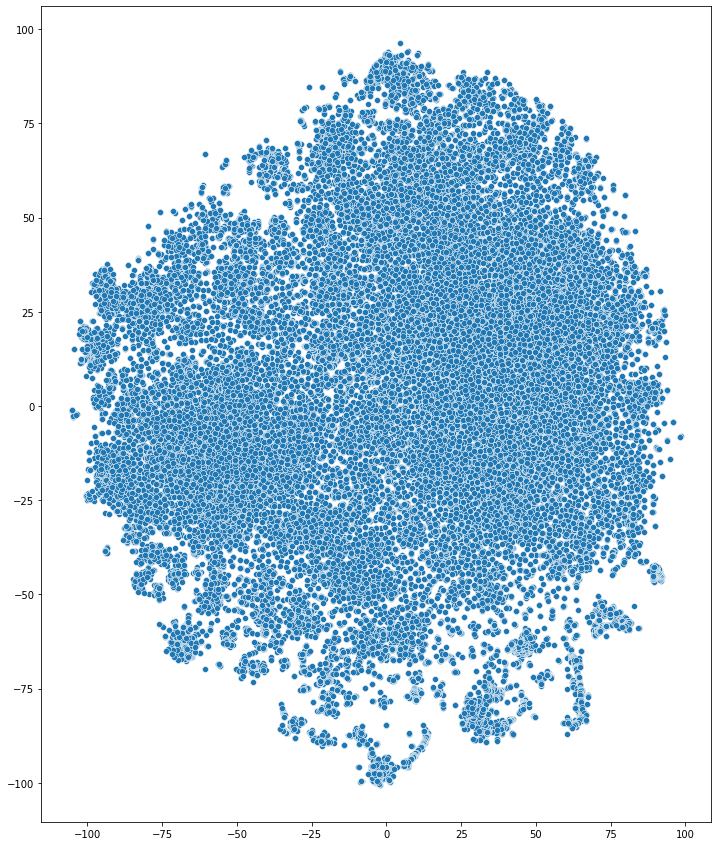

In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(12,15))
sns.scatterplot(x,y)

# T-SNE plot for displaying nearest 20 words for the word life

In [24]:
life_20_most_similar_vectors = [] 
life_20_most_similar_words = []

for item in list(life_20_most_similar.keys()):
  life_20_most_similar_vectors.append(word_embeddings[item])
  life_20_most_similar_words.append(item)

life_20_most_similar_vectors = np.array(life_20_most_similar_vectors)
life_20_most_similar_vectors.shape

(21, 50)

In [25]:
life_tsne = tsne_model.fit_transform(life_20_most_similar_vectors)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


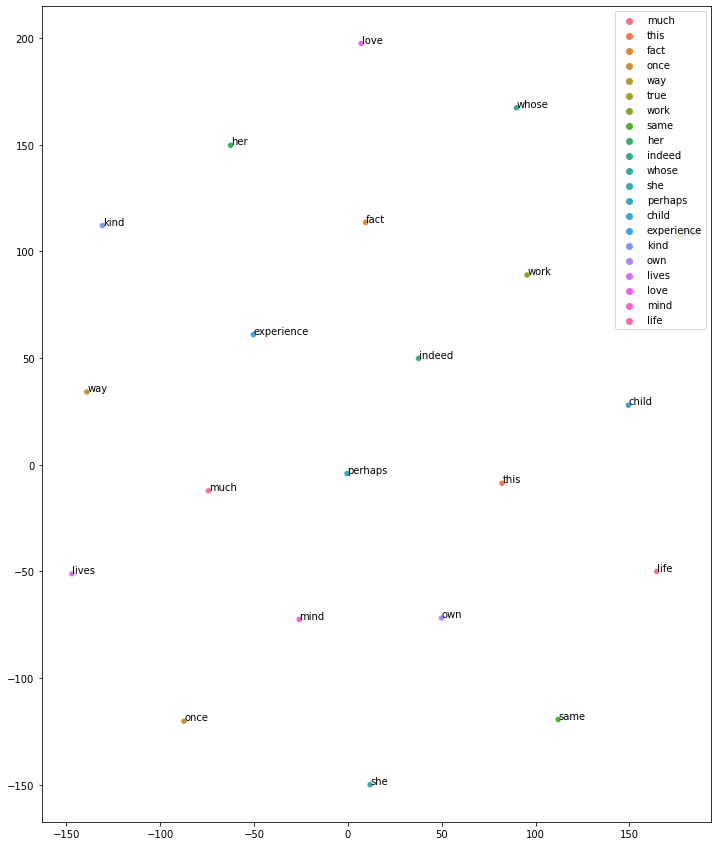

In [26]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(12,15))
sns.scatterplot(life_tsne[:, 0], life_tsne[:, 1], hue=life_20_most_similar_words)
for i, item in enumerate(life_20_most_similar_words):
    plt.annotate(item, (life_tsne[:, 0][i]+0.2, life_tsne[:, 1][i]+0.3) )

# T-SNE plot for displaying nearest 20 words for the word market

In [27]:
market_20_most_similar_vectors = [] 
market_20_most_similar_words = []

for item in list(market_20_most_similar.keys()):
  market_20_most_similar_vectors.append(word_embeddings[item])
  market_20_most_similar_words.append(item)

market_20_most_similar_vectors = np.array(market_20_most_similar_vectors)
market_20_most_similar_vectors.shape

(21, 50)

In [28]:
market_tsne = tsne_model.fit_transform(market_20_most_similar_vectors)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


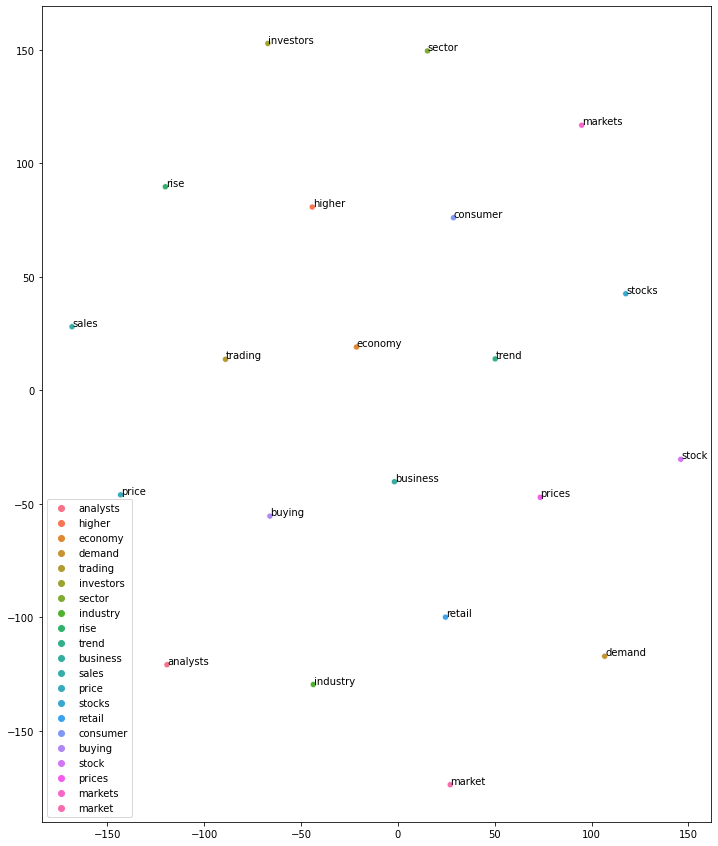

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(12,15))
sns.scatterplot(market_tsne[:, 0], market_tsne[:, 1], hue=market_20_most_similar_words)
for i, item in enumerate(market_20_most_similar_words):
    plt.annotate(item, (market_tsne[:, 0][i]+0.2, market_tsne[:, 1][i]+0.3) )

# T-SNE plot for displaying nearest 20 words for the word Stanford

In [30]:
Stanford_20_most_similar_vectors = [] 
Stanford_20_most_similar_words = []

for item in list(Stanford_20_most_similar.keys()):
  Stanford_20_most_similar_vectors.append(word_embeddings[item])
  Stanford_20_most_similar_words.append(item)

Stanford_20_most_similar_vectors = np.array(Stanford_20_most_similar_vectors)
Stanford_20_most_similar_vectors.shape

(21, 50)

In [31]:
Stanford_tsne = tsne_model.fit_transform(Stanford_20_most_similar_vectors)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


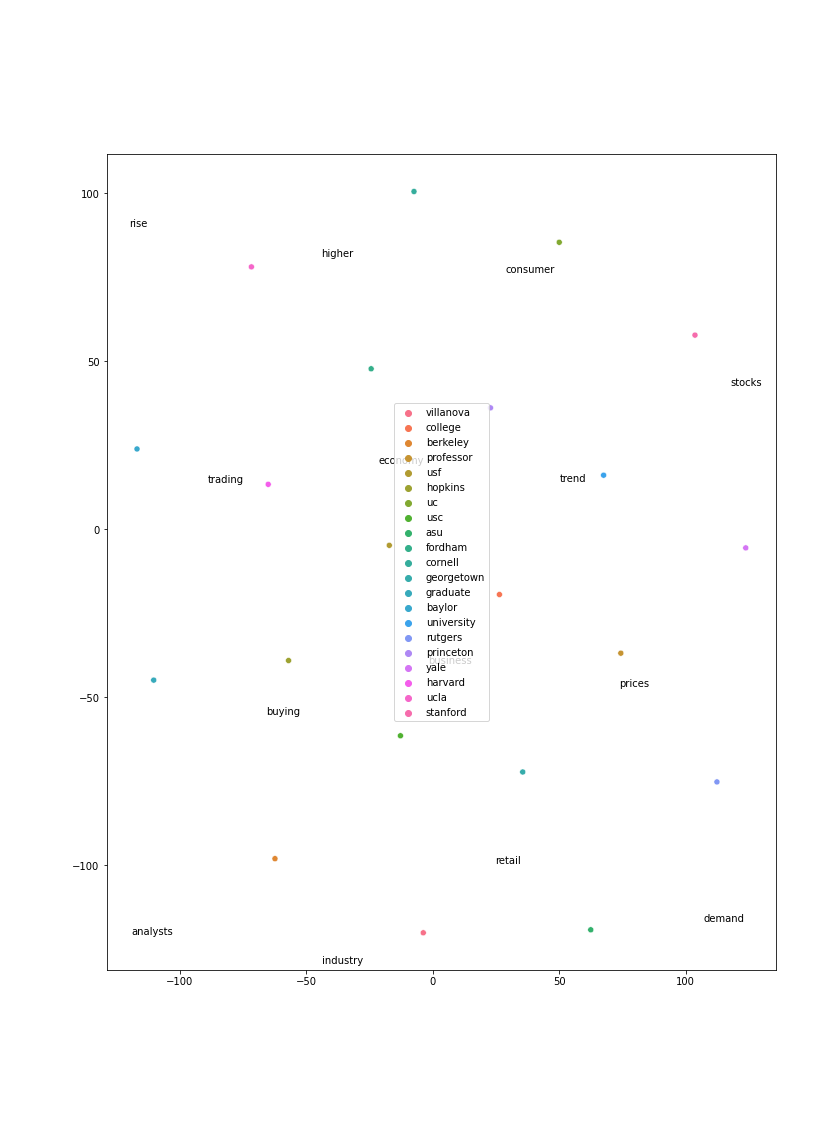

In [32]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(12,15))
sns.scatterplot(Stanford_tsne[:, 0], Stanford_tsne[:, 1], hue=Stanford_20_most_similar_words)
for i, item in enumerate(market_20_most_similar_words):
    plt.annotate(item, (market_tsne[:, 0][i]+0.2, market_tsne[:, 1][i]+0.3) )